In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(1, 16, 16)

In [4]:
t = np.linspace(0.1, 1.6, 16)

$y = 0.1x$,
$y = 0.2x$,
...,
$y = 1.6x$

In [5]:
sensors = np.zeros((16, 16))
for i in range(0, len(t)):
    for j in range(0, len(x)):
        sensors[i, j] = t[i] * x[j]

In [6]:
sensors = sensors.reshape(16, 16, 1)

In [7]:
sensors

array([[[ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6]],

       [[ 0.2],
        [ 0.4],
        [ 0.6],
        [ 0.8],
        [ 1. ],
        [ 1.2],
        [ 1.4],
        [ 1.6],
        [ 1.8],
        [ 2. ],
        [ 2.2],
        [ 2.4],
        [ 2.6],
        [ 2.8],
        [ 3. ],
        [ 3.2]],

       [[ 0.3],
        [ 0.6],
        [ 0.9],
        [ 1.2],
        [ 1.5],
        [ 1.8],
        [ 2.1],
        [ 2.4],
        [ 2.7],
        [ 3. ],
        [ 3.3],
        [ 3.6],
        [ 3.9],
        [ 4.2],
        [ 4.5],
        [ 4.8]],

       [[ 0.4],
        [ 0.8],
        [ 1.2],
        [ 1.6],
        [ 2. ],
        [ 2.4],
        [ 2.8],
        [ 3.2],
        [ 3.6],
        [ 4. ],
        [ 4.4],
        [ 4.8],
        [ 5.2],
        [ 5.6],
  

In [8]:
sensors.shape

(16, 16, 1)

In [9]:
t = t.reshape((16, 1))

In [10]:
t_train, t_test, x_train, x_test = train_test_split(t, sensors, test_size=0.1, random_state=1)

In [11]:
t_test

array([[0.4],
       [1.4]])

In [12]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [13]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [14]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
1/1 [==============================] - 1s 882ms/step - loss: 85.7662 - rmse: 9.2602
Epoch 2/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.7634 - rmse: 9.2601
Epoch 3/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.7606 - rmse: 9.2599
Epoch 4/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.7579 - rmse: 9.2598
Epoch 5/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.7551 - rmse: 9.2596
Epoch 6/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.7523 - rmse: 9.2595
Epoch 7/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.7495 - rmse: 9.2593
Epoch 8/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.7467 - rmse: 9.2592
Epoch 9/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.7439 - rmse: 9.2590
Epoch 10/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.7412 - rmse: 9.2589
Epoch 11/10000
1/1 [=================

1/1 [==============================] - 0s 4ms/step - loss: 85.3009 - rmse: 9.2351
Epoch 169/10000
1/1 [==============================] - 0s 6ms/step - loss: 85.2979 - rmse: 9.2349
Epoch 170/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2950 - rmse: 9.2348
Epoch 171/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2920 - rmse: 9.2346
Epoch 172/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.2890 - rmse: 9.2344
Epoch 173/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2860 - rmse: 9.2343
Epoch 174/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2830 - rmse: 9.2341
Epoch 175/10000
1/1 [==============================] - 0s 6ms/step - loss: 85.2801 - rmse: 9.2340
Epoch 176/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.2771 - rmse: 9.2338
Epoch 177/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2741 - rmse: 9.2336
Epoch 178/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 84.7342 - rmse: 9.2044
Epoch 335/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.7302 - rmse: 9.2042
Epoch 336/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.7263 - rmse: 9.2039
Epoch 337/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.7223 - rmse: 9.2037
Epoch 338/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.7183 - rmse: 9.2035
Epoch 339/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.7143 - rmse: 9.2033
Epoch 340/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.7103 - rmse: 9.2031
Epoch 341/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.7063 - rmse: 9.2029
Epoch 342/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.7023 - rmse: 9.2026
Epoch 343/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.6983 - rmse: 9.2024
Epoch 344/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 83.9289 - rmse: 9.1605
Epoch 501/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.9195 - rmse: 9.1600
Epoch 502/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.9100 - rmse: 9.1595
Epoch 503/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.9003 - rmse: 9.1590
Epoch 504/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.8907 - rmse: 9.1585
Epoch 505/10000
1/1 [==============================] - 0s 6ms/step - loss: 83.8809 - rmse: 9.1579
Epoch 506/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.8711 - rmse: 9.1574
Epoch 507/10000
1/1 [==============================] - 0s 3ms/step - loss: 83.8613 - rmse: 9.1569
Epoch 508/10000
1/1 [==============================] - 0s 6ms/step - loss: 83.8515 - rmse: 9.1563
Epoch 509/10000
1/1 [==============================] - 0s 3ms/step - loss: 83.8416 - rmse: 9.1558
Epoch 510/10000
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 82.1850 - rmse: 9.0649
Epoch 667/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.1731 - rmse: 9.0642
Epoch 668/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.1612 - rmse: 9.0636
Epoch 669/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.1493 - rmse: 9.0629
Epoch 670/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.1373 - rmse: 9.0622
Epoch 671/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.1254 - rmse: 9.0616
Epoch 672/10000
1/1 [==============================] - 0s 5ms/step - loss: 82.1134 - rmse: 9.0609
Epoch 673/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.1014 - rmse: 9.0603
Epoch 674/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.0894 - rmse: 9.0596
Epoch 675/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.0773 - rmse: 9.0589
Epoch 676/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 79.8958 - rmse: 8.9377
Epoch 833/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.8799 - rmse: 8.9368
Epoch 834/10000
1/1 [==============================] - 0s 6ms/step - loss: 79.8640 - rmse: 8.9359
Epoch 835/10000
1/1 [==============================] - 0s 3ms/step - loss: 79.8480 - rmse: 8.9350
Epoch 836/10000
1/1 [==============================] - 0s 3ms/step - loss: 79.8321 - rmse: 8.9341
Epoch 837/10000
1/1 [==============================] - 0s 6ms/step - loss: 79.8161 - rmse: 8.9332
Epoch 838/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.8000 - rmse: 8.9323
Epoch 839/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.7840 - rmse: 8.9315
Epoch 840/10000
1/1 [==============================] - 0s 6ms/step - loss: 79.7679 - rmse: 8.9306
Epoch 841/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.7518 - rmse: 8.9297
Epoch 842/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 76.8853 - rmse: 8.7677
Epoch 999/10000
1/1 [==============================] - 0s 5ms/step - loss: 76.8649 - rmse: 8.7665
Epoch 1000/10000
1/1 [==============================] - 0s 4ms/step - loss: 76.8445 - rmse: 8.7653
Epoch 1001/10000
1/1 [==============================] - 0s 10ms/step - loss: 76.8241 - rmse: 8.7642
Epoch 1002/10000
1/1 [==============================] - 0s 5ms/step - loss: 76.8036 - rmse: 8.7630
Epoch 1003/10000
1/1 [==============================] - 0s 9ms/step - loss: 76.7831 - rmse: 8.7618
Epoch 1004/10000
1/1 [==============================] - 0s 4ms/step - loss: 76.7626 - rmse: 8.7607
Epoch 1005/10000
1/1 [==============================] - 0s 10ms/step - loss: 76.7421 - rmse: 8.7595
Epoch 1006/10000
1/1 [==============================] - 0s 5ms/step - loss: 76.7215 - rmse: 8.7583
Epoch 1007/10000
1/1 [==============================] - 0s 9ms/step - loss: 76.7009 - rmse: 8.7571
Epoch 1008/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 73.2011 - rmse: 8.5550
Epoch 1163/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.1766 - rmse: 8.5536
Epoch 1164/10000
1/1 [==============================] - 0s 7ms/step - loss: 73.1522 - rmse: 8.5521
Epoch 1165/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.1277 - rmse: 8.5507
Epoch 1166/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.1032 - rmse: 8.5493
Epoch 1167/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.0786 - rmse: 8.5478
Epoch 1168/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.0541 - rmse: 8.5464
Epoch 1169/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.0295 - rmse: 8.5449
Epoch 1170/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.0049 - rmse: 8.5435
Epoch 1171/10000
1/1 [==============================] - 0s 4ms/step - loss: 72.9802 - rmse: 8.5421
Epoch 1172/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 68.8993 - rmse: 8.2998
Epoch 1327/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.8713 - rmse: 8.2981
Epoch 1328/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.8432 - rmse: 8.2964
Epoch 1329/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.8152 - rmse: 8.2947
Epoch 1330/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.7871 - rmse: 8.2930
Epoch 1331/10000
1/1 [==============================] - 0s 4ms/step - loss: 68.7590 - rmse: 8.2913
Epoch 1332/10000
1/1 [==============================] - 0s 4ms/step - loss: 68.7309 - rmse: 8.2896
Epoch 1333/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.7027 - rmse: 8.2879
Epoch 1334/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.6745 - rmse: 8.2862
Epoch 1335/10000
1/1 [==============================] - 0s 5ms/step - loss: 68.6463 - rmse: 8.2845
Epoch 1336/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 64.0350 - rmse: 8.0013
Epoch 1491/10000
1/1 [==============================] - 0s 5ms/step - loss: 64.0037 - rmse: 7.9994
Epoch 1492/10000
1/1 [==============================] - 0s 4ms/step - loss: 63.9724 - rmse: 7.9974
Epoch 1493/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.9411 - rmse: 7.9955
Epoch 1494/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.9098 - rmse: 7.9935
Epoch 1495/10000
1/1 [==============================] - 0s 4ms/step - loss: 63.8784 - rmse: 7.9915
Epoch 1496/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.8471 - rmse: 7.9896
Epoch 1497/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.8157 - rmse: 7.9876
Epoch 1498/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.7843 - rmse: 7.9857
Epoch 1499/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.7528 - rmse: 7.9837
Epoch 1500/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 58.6671 - rmse: 7.6585
Epoch 1655/10000
1/1 [==============================] - 0s 8ms/step - loss: 58.6331 - rmse: 7.6563
Epoch 1656/10000
1/1 [==============================] - 0s 5ms/step - loss: 58.5990 - rmse: 7.6541
Epoch 1657/10000
1/1 [==============================] - 0s 6ms/step - loss: 58.5649 - rmse: 7.6519
Epoch 1658/10000
1/1 [==============================] - 0s 5ms/step - loss: 58.5307 - rmse: 7.6496
Epoch 1659/10000
1/1 [==============================] - 0s 9ms/step - loss: 58.4966 - rmse: 7.6474
Epoch 1660/10000
1/1 [==============================] - 0s 4ms/step - loss: 58.4624 - rmse: 7.6452
Epoch 1661/10000
1/1 [==============================] - 0s 9ms/step - loss: 58.4283 - rmse: 7.6429
Epoch 1662/10000
1/1 [==============================] - 0s 5ms/step - loss: 58.3941 - rmse: 7.6407
Epoch 1663/10000
1/1 [==============================] - 0s 10ms/step - loss: 58.3599 - rmse: 7.6385
Epoch 1664/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 52.9096 - rmse: 7.2729
Epoch 1819/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.8737 - rmse: 7.2705
Epoch 1820/10000
1/1 [==============================] - 0s 5ms/step - loss: 52.8377 - rmse: 7.2680
Epoch 1821/10000
1/1 [==============================] - 0s 3ms/step - loss: 52.8017 - rmse: 7.2655
Epoch 1822/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.7657 - rmse: 7.2630
Epoch 1823/10000
1/1 [==============================] - 0s 5ms/step - loss: 52.7297 - rmse: 7.2606
Epoch 1824/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.6937 - rmse: 7.2581
Epoch 1825/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.6577 - rmse: 7.2556
Epoch 1826/10000
1/1 [==============================] - 0s 5ms/step - loss: 52.6216 - rmse: 7.2531
Epoch 1827/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.5856 - rmse: 7.2506
Epoch 1828/10000
1/1 [=====

1/1 [==============================] - 0s 6ms/step - loss: 46.9335 - rmse: 6.8498
Epoch 1983/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.8968 - rmse: 6.8471
Epoch 1984/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.8601 - rmse: 6.8444
Epoch 1985/10000
1/1 [==============================] - 0s 6ms/step - loss: 46.8234 - rmse: 6.8417
Epoch 1986/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.7867 - rmse: 6.8390
Epoch 1987/10000
1/1 [==============================] - 0s 3ms/step - loss: 46.7499 - rmse: 6.8364
Epoch 1988/10000
1/1 [==============================] - 0s 6ms/step - loss: 46.7132 - rmse: 6.8337
Epoch 1989/10000
1/1 [==============================] - 0s 4ms/step - loss: 46.6765 - rmse: 6.8310
Epoch 1990/10000
1/1 [==============================] - 0s 3ms/step - loss: 46.6398 - rmse: 6.8283
Epoch 1991/10000
1/1 [==============================] - 0s 6ms/step - loss: 46.6031 - rmse: 6.8256
Epoch 1992/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 40.9391 - rmse: 6.3972
Epoch 2147/10000
1/1 [==============================] - 0s 5ms/step - loss: 40.9030 - rmse: 6.3944
Epoch 2148/10000
1/1 [==============================] - 0s 4ms/step - loss: 40.8668 - rmse: 6.3916
Epoch 2149/10000
1/1 [==============================] - 0s 3ms/step - loss: 40.8306 - rmse: 6.3888
Epoch 2150/10000
1/1 [==============================] - 0s 4ms/step - loss: 40.7945 - rmse: 6.3859
Epoch 2151/10000
1/1 [==============================] - 0s 3ms/step - loss: 40.7583 - rmse: 6.3831
Epoch 2152/10000
1/1 [==============================] - 0s 4ms/step - loss: 40.7222 - rmse: 6.3803
Epoch 2153/10000
1/1 [==============================] - 0s 6ms/step - loss: 40.6861 - rmse: 6.3774
Epoch 2154/10000
1/1 [==============================] - 0s 4ms/step - loss: 40.6500 - rmse: 6.3746
Epoch 2155/10000
1/1 [==============================] - 0s 4ms/step - loss: 40.6139 - rmse: 6.3718
Epoch 2156/10000
1/1 [=====

1/1 [==============================] - 0s 3ms/step - loss: 35.1378 - rmse: 5.9265
Epoch 2311/10000
1/1 [==============================] - 0s 4ms/step - loss: 35.1034 - rmse: 5.9236
Epoch 2312/10000
1/1 [==============================] - 0s 6ms/step - loss: 35.0691 - rmse: 5.9207
Epoch 2313/10000
1/1 [==============================] - 0s 3ms/step - loss: 35.0347 - rmse: 5.9178
Epoch 2314/10000
1/1 [==============================] - 0s 3ms/step - loss: 35.0004 - rmse: 5.9149
Epoch 2315/10000
1/1 [==============================] - 0s 6ms/step - loss: 34.9661 - rmse: 5.9120
Epoch 2316/10000
1/1 [==============================] - 0s 4ms/step - loss: 34.9318 - rmse: 5.9091
Epoch 2317/10000
1/1 [==============================] - 0s 4ms/step - loss: 34.8976 - rmse: 5.9062
Epoch 2318/10000
1/1 [==============================] - 0s 4ms/step - loss: 34.8633 - rmse: 5.9033
Epoch 2319/10000
1/1 [==============================] - 0s 3ms/step - loss: 34.8291 - rmse: 5.9004
Epoch 2320/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 29.7290 - rmse: 5.4511
Epoch 2475/10000
1/1 [==============================] - 0s 5ms/step - loss: 29.6976 - rmse: 5.4482
Epoch 2476/10000
1/1 [==============================] - 0s 5ms/step - loss: 29.6662 - rmse: 5.4453
Epoch 2477/10000
1/1 [==============================] - 0s 8ms/step - loss: 29.6349 - rmse: 5.4424
Epoch 2478/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.6035 - rmse: 5.4395
Epoch 2479/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.5722 - rmse: 5.4367
Epoch 2480/10000
1/1 [==============================] - 0s 6ms/step - loss: 29.5409 - rmse: 5.4338
Epoch 2481/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.5096 - rmse: 5.4309
Epoch 2482/10000
1/1 [==============================] - 0s 8ms/step - loss: 29.4783 - rmse: 5.4280
Epoch 2483/10000
1/1 [==============================] - 0s 4ms/step - loss: 29.4471 - rmse: 5.4251
Epoch 2484/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 24.8762 - rmse: 4.9861
Epoch 2639/10000
1/1 [==============================] - 0s 5ms/step - loss: 24.8486 - rmse: 4.9833
Epoch 2640/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.8210 - rmse: 4.9805
Epoch 2641/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.7934 - rmse: 4.9778
Epoch 2642/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.7658 - rmse: 4.9750
Epoch 2643/10000
1/1 [==============================] - 0s 10ms/step - loss: 24.7383 - rmse: 4.9722
Epoch 2644/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.7108 - rmse: 4.9695
Epoch 2645/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.6833 - rmse: 4.9667
Epoch 2646/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.6558 - rmse: 4.9639
Epoch 2647/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.6284 - rmse: 4.9612
Epoch 2648/10000
1/1 [====

1/1 [==============================] - 0s 5ms/step - loss: 20.6844 - rmse: 4.5463
Epoch 2803/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.6610 - rmse: 4.5437
Epoch 2804/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.6376 - rmse: 4.5412
Epoch 2805/10000
1/1 [==============================] - 0s 8ms/step - loss: 20.6142 - rmse: 4.5386
Epoch 2806/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.5909 - rmse: 4.5360
Epoch 2807/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.5676 - rmse: 4.5335
Epoch 2808/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.5443 - rmse: 4.5309
Epoch 2809/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.5210 - rmse: 4.5283
Epoch 2810/10000
1/1 [==============================] - 0s 8ms/step - loss: 20.4978 - rmse: 4.5258
Epoch 2811/10000
1/1 [==============================] - 0s 4ms/step - loss: 20.4746 - rmse: 4.5232
Epoch 2812/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 17.1901 - rmse: 4.1442
Epoch 2967/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.1709 - rmse: 4.1419
Epoch 2968/10000
1/1 [==============================] - 0s 5ms/step - loss: 17.1517 - rmse: 4.1396
Epoch 2969/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.1326 - rmse: 4.1373
Epoch 2970/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.1135 - rmse: 4.1350
Epoch 2971/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.0944 - rmse: 4.1327
Epoch 2972/10000
1/1 [==============================] - 0s 5ms/step - loss: 17.0753 - rmse: 4.1304
Epoch 2973/10000
1/1 [==============================] - 0s 5ms/step - loss: 17.0563 - rmse: 4.1280
Epoch 2974/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.0372 - rmse: 4.1257
Epoch 2975/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.0183 - rmse: 4.1234
Epoch 2976/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 14.3666 - rmse: 3.7883
Epoch 3131/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.3513 - rmse: 3.7862
Epoch 3132/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.3361 - rmse: 3.7842
Epoch 3133/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.3208 - rmse: 3.7822
Epoch 3134/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.3056 - rmse: 3.7802
Epoch 3135/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.2904 - rmse: 3.7782
Epoch 3136/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.2752 - rmse: 3.7762
Epoch 3137/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.2600 - rmse: 3.7742
Epoch 3138/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.2449 - rmse: 3.7722
Epoch 3139/10000
1/1 [==============================] - 0s 5ms/step - loss: 14.2298 - rmse: 3.7702
Epoch 3140/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 12.1423 - rmse: 3.4823
Epoch 3295/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.1304 - rmse: 3.4806
Epoch 3296/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.1185 - rmse: 3.4789
Epoch 3297/10000
1/1 [==============================] - 0s 5ms/step - loss: 12.1066 - rmse: 3.4772
Epoch 3298/10000
1/1 [==============================] - 0s 5ms/step - loss: 12.0947 - rmse: 3.4755
Epoch 3299/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.0829 - rmse: 3.4738
Epoch 3300/10000
1/1 [==============================] - 0s 5ms/step - loss: 12.0711 - rmse: 3.4721
Epoch 3301/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.0593 - rmse: 3.4704
Epoch 3302/10000
1/1 [==============================] - 0s 5ms/step - loss: 12.0475 - rmse: 3.4687
Epoch 3303/10000
1/1 [==============================] - 0s 5ms/step - loss: 12.0357 - rmse: 3.4670
Epoch 3304/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 10.4223 - rmse: 3.2259
Epoch 3459/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.4131 - rmse: 3.2245
Epoch 3460/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.4040 - rmse: 3.2231
Epoch 3461/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3949 - rmse: 3.2216
Epoch 3462/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3858 - rmse: 3.2202
Epoch 3463/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3767 - rmse: 3.2188
Epoch 3464/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3676 - rmse: 3.2174
Epoch 3465/10000
1/1 [==============================] - 0s 6ms/step - loss: 10.3586 - rmse: 3.2160
Epoch 3466/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3495 - rmse: 3.2146
Epoch 3467/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3405 - rmse: 3.2132
Epoch 3468/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 9.0924 - rmse: 3.0127
Epoch 3625/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.0854 - rmse: 3.0115
Epoch 3626/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.0785 - rmse: 3.0104
Epoch 3627/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0715 - rmse: 3.0092
Epoch 3628/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0646 - rmse: 3.0081
Epoch 3629/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.0577 - rmse: 3.0069
Epoch 3630/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.0508 - rmse: 3.0058
Epoch 3631/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.0439 - rmse: 3.0046
Epoch 3632/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.0370 - rmse: 3.0035
Epoch 3633/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.0302 - rmse: 3.0024
Epoch 3634/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 8.0792 - rmse: 2.8396
Epoch 3791/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0739 - rmse: 2.8386
Epoch 3792/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0686 - rmse: 2.8377
Epoch 3793/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0633 - rmse: 2.8368
Epoch 3794/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0580 - rmse: 2.8358
Epoch 3795/10000
1/1 [==============================] - 0s 6ms/step - loss: 8.0527 - rmse: 2.8349
Epoch 3796/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0474 - rmse: 2.8340
Epoch 3797/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0421 - rmse: 2.8330
Epoch 3798/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0369 - rmse: 2.8321
Epoch 3799/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.0316 - rmse: 2.8312
Epoch 3800/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 7.2996 - rmse: 2.6988
Epoch 3957/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2955 - rmse: 2.6980
Epoch 3958/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2913 - rmse: 2.6973
Epoch 3959/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2872 - rmse: 2.6965
Epoch 3960/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2831 - rmse: 2.6957
Epoch 3961/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2790 - rmse: 2.6950
Epoch 3962/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2749 - rmse: 2.6942
Epoch 3963/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2708 - rmse: 2.6935
Epoch 3964/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2667 - rmse: 2.6927
Epoch 3965/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2626 - rmse: 2.6919
Epoch 3966/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 6.6876 - rmse: 2.5829
Epoch 4123/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6844 - rmse: 2.5823
Epoch 4124/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6811 - rmse: 2.5817
Epoch 4125/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6778 - rmse: 2.5810
Epoch 4126/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6745 - rmse: 2.5804
Epoch 4127/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6713 - rmse: 2.5798
Epoch 4128/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6680 - rmse: 2.5791
Epoch 4129/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6647 - rmse: 2.5785
Epoch 4130/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6615 - rmse: 2.5779
Epoch 4131/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6582 - rmse: 2.5772
Epoch 4132/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 6.1940 - rmse: 2.4855
Epoch 4289/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1912 - rmse: 2.4850
Epoch 4290/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1885 - rmse: 2.4844
Epoch 4291/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1857 - rmse: 2.4839
Epoch 4292/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.1829 - rmse: 2.4833
Epoch 4293/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1800 - rmse: 2.4827
Epoch 4294/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1771 - rmse: 2.4821
Epoch 4295/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1742 - rmse: 2.4815
Epoch 4296/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1713 - rmse: 2.4810
Epoch 4297/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1683 - rmse: 2.4804
Epoch 4298/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 5.7625 - rmse: 2.3971
Epoch 4455/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7601 - rmse: 2.3966
Epoch 4456/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7577 - rmse: 2.3961
Epoch 4457/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7553 - rmse: 2.3956
Epoch 4458/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7529 - rmse: 2.3951
Epoch 4459/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7505 - rmse: 2.3946
Epoch 4460/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7481 - rmse: 2.3941
Epoch 4461/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7457 - rmse: 2.3936
Epoch 4462/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.7433 - rmse: 2.3931
Epoch 4463/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.7409 - rmse: 2.3926
Epoch 4464/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 5.3873 - rmse: 2.3175
Epoch 4621/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3852 - rmse: 2.3171
Epoch 4622/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.3831 - rmse: 2.3166
Epoch 4623/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.3810 - rmse: 2.3162
Epoch 4624/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.3788 - rmse: 2.3157
Epoch 4625/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.3767 - rmse: 2.3153
Epoch 4626/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.3746 - rmse: 2.3148
Epoch 4627/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.3725 - rmse: 2.3143
Epoch 4628/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.3704 - rmse: 2.3139
Epoch 4629/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.3682 - rmse: 2.3134
Epoch 4630/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 5.0517 - rmse: 2.2439
Epoch 4787/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0497 - rmse: 2.2435
Epoch 4788/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0478 - rmse: 2.2431
Epoch 4789/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0459 - rmse: 2.2427
Epoch 4790/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0440 - rmse: 2.2422
Epoch 4791/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0420 - rmse: 2.2418
Epoch 4792/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0401 - rmse: 2.2414
Epoch 4793/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0382 - rmse: 2.2409
Epoch 4794/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0363 - rmse: 2.2405
Epoch 4795/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0344 - rmse: 2.2401
Epoch 4796/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 4.7442 - rmse: 2.1743
Epoch 4953/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7424 - rmse: 2.1739
Epoch 4954/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7406 - rmse: 2.1735
Epoch 4955/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7388 - rmse: 2.1731
Epoch 4956/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7371 - rmse: 2.1727
Epoch 4957/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7353 - rmse: 2.1723
Epoch 4958/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7335 - rmse: 2.1719
Epoch 4959/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7317 - rmse: 2.1715
Epoch 4960/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7299 - rmse: 2.1711
Epoch 4961/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7282 - rmse: 2.1706
Epoch 4962/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 4.4568 - rmse: 2.1072
Epoch 5119/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4552 - rmse: 2.1068
Epoch 5120/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4535 - rmse: 2.1064
Epoch 5121/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4518 - rmse: 2.1060
Epoch 5122/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4501 - rmse: 2.1056
Epoch 5123/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4484 - rmse: 2.1052
Epoch 5124/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4468 - rmse: 2.1048
Epoch 5125/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4451 - rmse: 2.1044
Epoch 5126/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4434 - rmse: 2.1040
Epoch 5127/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.4417 - rmse: 2.1036
Epoch 5128/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 4.1846 - rmse: 2.0415
Epoch 5285/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1830 - rmse: 2.0412
Epoch 5286/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1814 - rmse: 2.0408
Epoch 5287/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1798 - rmse: 2.0404
Epoch 5288/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1782 - rmse: 2.0400
Epoch 5289/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1766 - rmse: 2.0396
Epoch 5290/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1750 - rmse: 2.0392
Epoch 5291/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1734 - rmse: 2.0388
Epoch 5292/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1718 - rmse: 2.0384
Epoch 5293/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1702 - rmse: 2.0380
Epoch 5294/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 3.9235 - rmse: 1.9765
Epoch 5451/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9220 - rmse: 1.9762
Epoch 5452/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9204 - rmse: 1.9758
Epoch 5453/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9189 - rmse: 1.9754
Epoch 5454/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9173 - rmse: 1.9750
Epoch 5455/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9158 - rmse: 1.9746
Epoch 5456/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9142 - rmse: 1.9742
Epoch 5457/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.9127 - rmse: 1.9738
Epoch 5458/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9112 - rmse: 1.9734
Epoch 5459/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.9096 - rmse: 1.9730
Epoch 5460/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 3.6708 - rmse: 1.9115
Epoch 5617/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6693 - rmse: 1.9111
Epoch 5618/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6677 - rmse: 1.9107
Epoch 5619/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6662 - rmse: 1.9103
Epoch 5620/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6647 - rmse: 1.9099
Epoch 5621/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6632 - rmse: 1.9095
Epoch 5622/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6617 - rmse: 1.9091
Epoch 5623/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6602 - rmse: 1.9088
Epoch 5624/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6587 - rmse: 1.9084
Epoch 5625/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6572 - rmse: 1.9080
Epoch 5626/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 3.4244 - rmse: 1.8459
Epoch 5783/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4229 - rmse: 1.8455
Epoch 5784/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4215 - rmse: 1.8451
Epoch 5785/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.4200 - rmse: 1.8447
Epoch 5786/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4185 - rmse: 1.8443
Epoch 5787/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4171 - rmse: 1.8439
Epoch 5788/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4156 - rmse: 1.8435
Epoch 5789/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4141 - rmse: 1.8431
Epoch 5790/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4127 - rmse: 1.8427
Epoch 5791/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.4112 - rmse: 1.8423
Epoch 5792/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 3.1833 - rmse: 1.7793
Epoch 5949/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1818 - rmse: 1.7789
Epoch 5950/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1804 - rmse: 1.7785
Epoch 5951/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1789 - rmse: 1.7781
Epoch 5952/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1775 - rmse: 1.7777
Epoch 5953/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1761 - rmse: 1.7773
Epoch 5954/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1746 - rmse: 1.7769
Epoch 5955/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1732 - rmse: 1.7765
Epoch 5956/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1718 - rmse: 1.7761
Epoch 5957/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1703 - rmse: 1.7757
Epoch 5958/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 2.9468 - rmse: 1.7116
Epoch 6115/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9454 - rmse: 1.7112
Epoch 6116/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9440 - rmse: 1.7107
Epoch 6117/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9426 - rmse: 1.7103
Epoch 6118/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9412 - rmse: 1.7099
Epoch 6119/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9398 - rmse: 1.7095
Epoch 6120/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9384 - rmse: 1.7091
Epoch 6121/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9369 - rmse: 1.7087
Epoch 6122/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9355 - rmse: 1.7083
Epoch 6123/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9341 - rmse: 1.7079
Epoch 6124/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 2.7150 - rmse: 1.6424
Epoch 6281/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7136 - rmse: 1.6420
Epoch 6282/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7122 - rmse: 1.6416
Epoch 6283/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7108 - rmse: 1.6411
Epoch 6284/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7095 - rmse: 1.6407
Epoch 6285/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7081 - rmse: 1.6403
Epoch 6286/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7067 - rmse: 1.6399
Epoch 6287/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7053 - rmse: 1.6395
Epoch 6288/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7039 - rmse: 1.6390
Epoch 6289/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7026 - rmse: 1.6386
Epoch 6290/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 2.4881 - rmse: 1.5718
Epoch 6447/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4867 - rmse: 1.5713
Epoch 6448/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4854 - rmse: 1.5709
Epoch 6449/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4840 - rmse: 1.5705
Epoch 6450/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4827 - rmse: 1.5700
Epoch 6451/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4813 - rmse: 1.5696
Epoch 6452/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4800 - rmse: 1.5692
Epoch 6453/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4786 - rmse: 1.5688
Epoch 6454/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4773 - rmse: 1.5683
Epoch 6455/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4759 - rmse: 1.5679
Epoch 6456/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 2.2667 - rmse: 1.4996
Epoch 6613/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2653 - rmse: 1.4992
Epoch 6614/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2640 - rmse: 1.4987
Epoch 6615/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2627 - rmse: 1.4983
Epoch 6616/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2614 - rmse: 1.4979
Epoch 6617/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2601 - rmse: 1.4974
Epoch 6618/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2588 - rmse: 1.4970
Epoch 6619/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2574 - rmse: 1.4965
Epoch 6620/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2561 - rmse: 1.4961
Epoch 6621/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.2548 - rmse: 1.4957
Epoch 6622/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 2.0515 - rmse: 1.4260
Epoch 6779/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0502 - rmse: 1.4256
Epoch 6780/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0490 - rmse: 1.4251
Epoch 6781/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0477 - rmse: 1.4247
Epoch 6782/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0464 - rmse: 1.4242
Epoch 6783/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0451 - rmse: 1.4238
Epoch 6784/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0439 - rmse: 1.4233
Epoch 6785/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0426 - rmse: 1.4229
Epoch 6786/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0413 - rmse: 1.4224
Epoch 6787/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0400 - rmse: 1.4220
Epoch 6788/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 1.8435 - rmse: 1.3511
Epoch 6945/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8423 - rmse: 1.3506
Epoch 6946/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8411 - rmse: 1.3502
Epoch 6947/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8399 - rmse: 1.3497
Epoch 6948/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8386 - rmse: 1.3492
Epoch 6949/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8374 - rmse: 1.3488
Epoch 6950/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8362 - rmse: 1.3483
Epoch 6951/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8349 - rmse: 1.3479
Epoch 6952/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8337 - rmse: 1.3474
Epoch 6953/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.8325 - rmse: 1.3470
Epoch 6954/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.6438 - rmse: 1.2749
Epoch 7111/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6426 - rmse: 1.2745
Epoch 7112/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6414 - rmse: 1.2740
Epoch 7113/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6402 - rmse: 1.2735
Epoch 7114/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6391 - rmse: 1.2731
Epoch 7115/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6379 - rmse: 1.2726
Epoch 7116/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6367 - rmse: 1.2721
Epoch 7117/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6355 - rmse: 1.2717
Epoch 7118/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6344 - rmse: 1.2712
Epoch 7119/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6332 - rmse: 1.2708
Epoch 7120/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 1.4532 - rmse: 1.1978
Epoch 7277/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4521 - rmse: 1.1973
Epoch 7278/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4510 - rmse: 1.1968
Epoch 7279/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4498 - rmse: 1.1964
Epoch 7280/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4487 - rmse: 1.1959
Epoch 7281/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4476 - rmse: 1.1954
Epoch 7282/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4465 - rmse: 1.1950
Epoch 7283/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4454 - rmse: 1.1945
Epoch 7284/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4443 - rmse: 1.1940
Epoch 7285/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4431 - rmse: 1.1936
Epoch 7286/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 1.2729 - rmse: 1.1199
Epoch 7443/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2718 - rmse: 1.1194
Epoch 7444/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2708 - rmse: 1.1190
Epoch 7445/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2697 - rmse: 1.1185
Epoch 7446/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2687 - rmse: 1.1180
Epoch 7447/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2676 - rmse: 1.1175
Epoch 7448/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2666 - rmse: 1.1171
Epoch 7449/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2655 - rmse: 1.1166
Epoch 7450/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2645 - rmse: 1.1161
Epoch 7451/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2634 - rmse: 1.1157
Epoch 7452/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 1.1037 - rmse: 1.0416
Epoch 7609/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1027 - rmse: 1.0411
Epoch 7610/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1018 - rmse: 1.0406
Epoch 7611/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1008 - rmse: 1.0401
Epoch 7612/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0998 - rmse: 1.0397
Epoch 7613/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0988 - rmse: 1.0392
Epoch 7614/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0978 - rmse: 1.0387
Epoch 7615/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0969 - rmse: 1.0382
Epoch 7616/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0959 - rmse: 1.0378
Epoch 7617/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0949 - rmse: 1.0373
Epoch 7618/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.9466 - rmse: 0.9631
Epoch 7775/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9457 - rmse: 0.9626
Epoch 7776/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9448 - rmse: 0.9621
Epoch 7777/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9439 - rmse: 0.9617
Epoch 7778/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9430 - rmse: 0.9612
Epoch 7779/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9421 - rmse: 0.9607
Epoch 7780/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9412 - rmse: 0.9603
Epoch 7781/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9403 - rmse: 0.9598
Epoch 7782/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9394 - rmse: 0.9593
Epoch 7783/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9385 - rmse: 0.9588
Epoch 7784/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.8023 - rmse: 0.8849
Epoch 7941/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8014 - rmse: 0.8844
Epoch 7942/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8006 - rmse: 0.8839
Epoch 7943/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7998 - rmse: 0.8835
Epoch 7944/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7989 - rmse: 0.8830
Epoch 7945/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7981 - rmse: 0.8825
Epoch 7946/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7973 - rmse: 0.8821
Epoch 7947/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7965 - rmse: 0.8816
Epoch 7948/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7956 - rmse: 0.8811
Epoch 7949/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7948 - rmse: 0.8806
Epoch 7950/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.6699 - rmse: 0.8065
Epoch 8107/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6691 - rmse: 0.8060
Epoch 8108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6683 - rmse: 0.8055
Epoch 8109/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6676 - rmse: 0.8051
Epoch 8110/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6668 - rmse: 0.8046
Epoch 8111/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6660 - rmse: 0.8041
Epoch 8112/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6652 - rmse: 0.8036
Epoch 8113/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.6645 - rmse: 0.8031
Epoch 8114/10000
1/1 [==============================] - 0s 28ms/step - loss: 0.6637 - rmse: 0.8026
Epoch 8115/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6629 - rmse: 0.8022
Epoch 8116/10000
1/1 [==============

1/1 [==============================] - 0s 8ms/step - loss: 0.5463 - rmse: 0.7258
Epoch 8273/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5456 - rmse: 0.7253
Epoch 8274/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.5449 - rmse: 0.7248
Epoch 8275/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5442 - rmse: 0.7243
Epoch 8276/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.5435 - rmse: 0.7238
Epoch 8277/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.5428 - rmse: 0.7233
Epoch 8278/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.5421 - rmse: 0.7228
Epoch 8279/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5414 - rmse: 0.7223
Epoch 8280/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5407 - rmse: 0.7218
Epoch 8281/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5400 - rmse: 0.7214
Epoch 8282/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 0.4360 - rmse: 0.6451
Epoch 8439/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4354 - rmse: 0.6446
Epoch 8440/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4347 - rmse: 0.6442
Epoch 8441/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4341 - rmse: 0.6437
Epoch 8442/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4335 - rmse: 0.6432
Epoch 8443/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4329 - rmse: 0.6427
Epoch 8444/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4323 - rmse: 0.6422
Epoch 8445/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4317 - rmse: 0.6418
Epoch 8446/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4311 - rmse: 0.6413
Epoch 8447/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4304 - rmse: 0.6408
Epoch 8448/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 0.3417 - rmse: 0.5672
Epoch 8605/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3412 - rmse: 0.5668
Epoch 8606/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3407 - rmse: 0.5663
Epoch 8607/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3402 - rmse: 0.5658
Epoch 8608/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3396 - rmse: 0.5654
Epoch 8609/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3391 - rmse: 0.5649
Epoch 8610/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.3386 - rmse: 0.5645
Epoch 8611/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3381 - rmse: 0.5640
Epoch 8612/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3376 - rmse: 0.5635
Epoch 8613/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3371 - rmse: 0.5631
Epoch 8614/10000
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 0.2633 - rmse: 0.4931
Epoch 8771/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2628 - rmse: 0.4926
Epoch 8772/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2624 - rmse: 0.4922
Epoch 8773/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2620 - rmse: 0.4918
Epoch 8774/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2616 - rmse: 0.4913
Epoch 8775/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2611 - rmse: 0.4909
Epoch 8776/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2607 - rmse: 0.4905
Epoch 8777/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2603 - rmse: 0.4900
Epoch 8778/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2599 - rmse: 0.4896
Epoch 8779/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2594 - rmse: 0.4892
Epoch 8780/10000
1/1 [==============

1/1 [==============================] - 0s 10ms/step - loss: 0.1996 - rmse: 0.4234
Epoch 8937/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1993 - rmse: 0.4230
Epoch 8938/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1989 - rmse: 0.4226
Epoch 8939/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1986 - rmse: 0.4222
Epoch 8940/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1982 - rmse: 0.4218
Epoch 8941/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1979 - rmse: 0.4214
Epoch 8942/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1976 - rmse: 0.4210
Epoch 8943/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1972 - rmse: 0.4206
Epoch 8944/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1969 - rmse: 0.4202
Epoch 8945/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1965 - rmse: 0.4198
Epoch 8946/10000
1/1 [=============

1/1 [==============================] - 0s 4ms/step - loss: 0.1494 - rmse: 0.3592
Epoch 9103/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1492 - rmse: 0.3588
Epoch 9104/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1489 - rmse: 0.3584
Epoch 9105/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1486 - rmse: 0.3581
Epoch 9106/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1484 - rmse: 0.3577
Epoch 9107/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1481 - rmse: 0.3573
Epoch 9108/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1478 - rmse: 0.3569
Epoch 9109/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1476 - rmse: 0.3566
Epoch 9110/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1473 - rmse: 0.3562
Epoch 9111/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1471 - rmse: 0.3558
Epoch 9112/10000
1/1 [============

1/1 [==============================] - 0s 4ms/step - loss: 0.1111 - rmse: 0.3010
Epoch 9269/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1109 - rmse: 0.3006
Epoch 9270/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1107 - rmse: 0.3003
Epoch 9271/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.1105 - rmse: 0.3000
Epoch 9272/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.1103 - rmse: 0.2997
Epoch 9273/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1101 - rmse: 0.2993
Epoch 9274/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.1099 - rmse: 0.2990
Epoch 9275/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1097 - rmse: 0.2987
Epoch 9276/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.1096 - rmse: 0.2983
Epoch 9277/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.1094 - rmse: 0.2980
Epoch 9278/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 0.0829 - rmse: 0.2496
Epoch 9435/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0828 - rmse: 0.2493
Epoch 9436/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0826 - rmse: 0.2490
Epoch 9437/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0825 - rmse: 0.2487
Epoch 9438/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0824 - rmse: 0.2484
Epoch 9439/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0822 - rmse: 0.2481
Epoch 9440/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0821 - rmse: 0.2478
Epoch 9441/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0819 - rmse: 0.2475
Epoch 9442/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0818 - rmse: 0.2473
Epoch 9443/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0816 - rmse: 0.2470
Epoch 9444/10000
1/1 [==============

1/1 [==============================] - 0s 10ms/step - loss: 0.0629 - rmse: 0.2054
Epoch 9601/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0628 - rmse: 0.2051
Epoch 9602/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0627 - rmse: 0.2049
Epoch 9603/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0626 - rmse: 0.2046
Epoch 9604/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0625 - rmse: 0.2044
Epoch 9605/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0624 - rmse: 0.2042
Epoch 9606/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0623 - rmse: 0.2039
Epoch 9607/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0622 - rmse: 0.2037
Epoch 9608/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0621 - rmse: 0.2034
Epoch 9609/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0620 - rmse: 0.2032
Epoch 9610/10000
1/1 [=============

1/1 [==============================] - 0s 4ms/step - loss: 0.0493 - rmse: 0.1687
Epoch 9767/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0492 - rmse: 0.1685
Epoch 9768/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0491 - rmse: 0.1683
Epoch 9769/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.0491 - rmse: 0.1681
Epoch 9770/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0490 - rmse: 0.1679
Epoch 9771/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0489 - rmse: 0.1677
Epoch 9772/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0489 - rmse: 0.1675
Epoch 9773/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0488 - rmse: 0.1673
Epoch 9774/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0487 - rmse: 0.1671
Epoch 9775/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0487 - rmse: 0.1669
Epoch 9776/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.0403 - rmse: 0.1394
Epoch 9933/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0402 - rmse: 0.1392
Epoch 9934/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0402 - rmse: 0.1391
Epoch 9935/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0402 - rmse: 0.1389
Epoch 9936/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.0401 - rmse: 0.1388
Epoch 9937/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0401 - rmse: 0.1386
Epoch 9938/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.0400 - rmse: 0.1385
Epoch 9939/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0400 - rmse: 0.1383
Epoch 9940/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.0399 - rmse: 0.1381
Epoch 9941/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.0399 - rmse: 0.1380
Epoch 9942/10000
1/1 [==============

In [15]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:01:04.784034


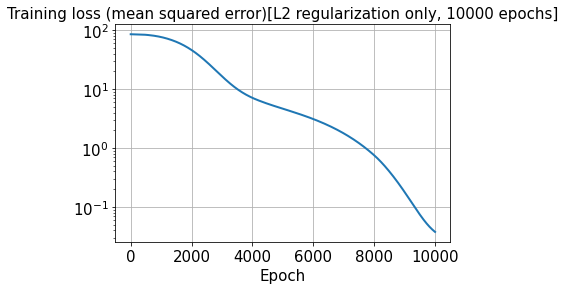

In [28]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.yscale("log")
plt.title('Training loss (mean squared error)[L2 regularization only, 10000 epochs]', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

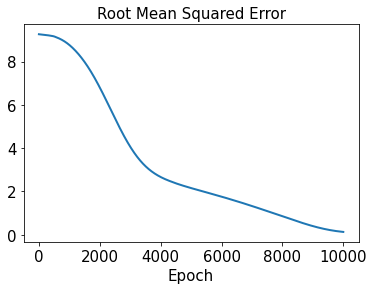

In [17]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [18]:
decoded_sensor_train = sensor_pred1.predict(t_train)

In [19]:
decoded_sensor_test = sensor_pred1.predict(t_test)

In [20]:
error_train_abs = np.abs(decoded_sensor_train - x_train)

In [21]:
error_test_abs = np.abs(decoded_sensor_test - x_test)

In [22]:
error_train_abs

array([[[5.34029007e-03],
        [2.88940430e-02],
        [1.61037445e-03],
        [1.08527660e-02],
        [3.13735008e-02],
        [2.56812096e-02],
        [4.02809143e-02],
        [4.25700188e-02],
        [2.62840271e-02],
        [3.40404510e-02],
        [1.51203156e-02],
        [5.83271027e-02],
        [2.23747253e-02],
        [7.72579193e-02],
        [1.06000900e-01],
        [1.51167107e-01]],

       [[1.25903606e-02],
        [7.91148305e-02],
        [4.27017212e-03],
        [2.86116123e-02],
        [8.88056755e-02],
        [7.33012676e-02],
        [1.08666039e-01],
        [1.15512753e-01],
        [7.22764015e-02],
        [9.66610909e-02],
        [4.16512966e-02],
        [1.59769917e-01],
        [5.41406631e-02],
        [2.30394173e-01],
        [3.39949131e-01],
        [5.27962399e-01]],

       [[6.79014921e-03],
        [3.89383078e-02],
        [2.14233398e-03],
        [1.44048214e-02],
        [4.28600311e-02],
        [3.52051735e-02],
        

In [23]:
l2_error_sensor_train = np.sqrt(np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2))
print(l2_error_sensor_train)

0.013960113538434127


In [24]:
l2_error_sensor_test = np.sqrt(np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2))
print(l2_error_sensor_test)

0.013125962302515268
